## Task 1: Import Libraries

In [2]:
# Write the code to import the required libraries here.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Write the code to import the required modules here.
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

## Task 2: Load the Datasets

In [4]:
# Write the code to load the datasets here.
df_train = pd.read_csv("./usercode/train.csv")
df_test = pd.read_csv("./usercode/test.csv")
df_features = pd.read_csv("./usercode/features.csv")
df_stores = pd.read_csv("./usercode/stores.csv")

In [5]:
# Write the code to show the first five records of training set here.
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
# Write the code to show the first five records of test set here.
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
# Write the code to show the first five records of feature dataset here.
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
# Write the code to show the first five records of store dataset here.
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## Task 3: Handle Missing Values

In [9]:
# Write the code to check the missing values of training set here.
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
# Write the code to check the missing values of test set here.
df_test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [11]:
# Write the code to check the missing values of store DataFrame here.
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [12]:
# Write the code to check the missing values of feature DataFrame here.
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [13]:
# Write the code to replace the Markdown fields' null values with zero here.

df_features[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4', 
'MarkDown5']] = df_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 
'MarkDown4', 'MarkDown5']].fillna(0) 

In [14]:
# Write the code to remove the remaining null values here.
df_features.dropna(inplace=True)

In [15]:
# Write the code to check for the missing values again here.
df_features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

## Task 4: Merge the Datasets

In [16]:
# Write the code to merge the training set with the features and store DataFrame here.
df_train_merge = df_train.merge(df_features, on=['Store', 'Date'], 
how='inner').merge(df_stores, on=['Store'], how='inner')

df_train_merge.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [17]:
# Write the code to merge the test set with the features and store DataFrame here.
df_test_merge = df_test.merge(df_features, on=['Store', 'Date'], 
how='inner').merge(df_stores, on=['Store'], how='inner')

df_test_merge.head()


,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315


## Task 5: Remove Duplicate Column

In [18]:
# Write the code to remove the duplicate columns here.
df_train_merge.drop(['IsHoliday_y'], axis=1,inplace=True)
df_test_merge.drop(['IsHoliday_y'], axis=1,inplace=True)


In [19]:
# Write the code to rename the columns here.
df_train_merge.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df_test_merge.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)


In [20]:
# Write the code to show the first five records of preprocessed training set here.
df_train_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [21]:
# Write the code to show the first five records of preprocessed test set here.
df_test_merge.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


## Task 6: Remove Outliers

In [22]:
# Write the code to identify the columns where outliers exist on the merged training DataFrame here.
df_train_merge.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [23]:
# Write the code to identify the columns where outliers exist on the merged test DataFrame here.
df_test_merge.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000,76902.000000
mean,22.225495,44.291020,44.672745,3.562298,8770.018428,3906.273762,3190.229696,3151.928967,4109.544599,176.961347,6.868733,136419.464617
std,12.812855,30.633631,14.210558,0.271355,12347.596125,8820.284082,16033.039840,8455.381645,23609.687951,41.239967,1.583427,61127.496112
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.000000,-185.170000,131.236226,3.684000,34875.000000
25%,11.000000,18.000000,34.730000,3.379000,2005.310000,0.000000,5.550000,51.870000,1259.960000,138.402033,5.771000,93638.000000
50%,22.000000,37.000000,44.790000,3.597000,5182.140000,322.990000,49.160000,381.880000,2273.800000,192.304445,6.806000,140167.000000
75%,33.000000,74.000000,56.160000,3.771000,10649.250000,3163.890000,243.280000,2067.420000,4166.060000,223.244532,8.036000,202505.000000
max,45.000000,99.000000,76.550000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000


In [24]:
# Write the code to remove outliers from the merged DataFrames here.
df_train_clean =  df_train_merge.loc[(df_train_merge["Weekly_Sales"] > 0) 
& (df_train_merge["MarkDown2"] >= 0) & (df_train_merge["MarkDown3"] >= 0)]

df_test_clean = df_test_merge.loc[(df_test_merge["MarkDown1"] >= 0) &  
(df_test_merge["MarkDown2"] >= 0) & (df_test_merge["MarkDown3"] >= 0) & 
(df_test_merge["MarkDown5"] >= 0)]


## Task 7: Normalize Data

In [25]:
# Write the code to create a new copy of the cleaned DataFrame here.
df_normalized = df_train_clean.copy()

In [26]:
# Write the code to apply logarithmic base-10 normalization on the Weekly_Sales column here.
df_normalized['Weekly_Sales_Log10'] =  np.log10(df_normalized['Weekly_Sales'])

## Task 8: Visualize Sales Seasonlity

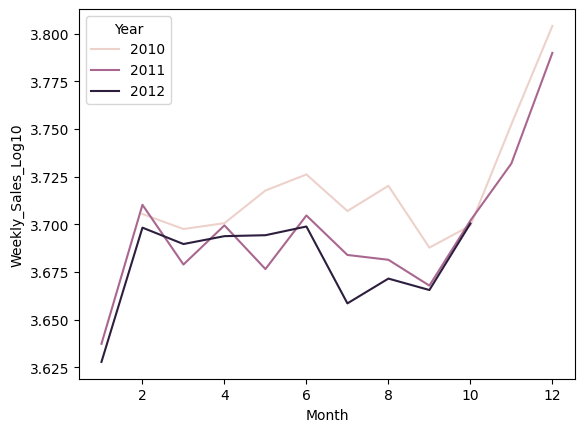

In [27]:
# Write the code to create a line chart here.
df_normalized["Date"] = pd.to_datetime(df_normalized["Date"])
df_normalized["Year"] = df_normalized["Date"].dt.year
df_normalized["Month"] = df_normalized["Date"].dt.month

sns.lineplot(data=df_normalized, x="Month", y="Weekly_Sales_Log10", hue="Year", errorbar=None)
plt.show()


## Task 9: Visualize Sales Performance by Type

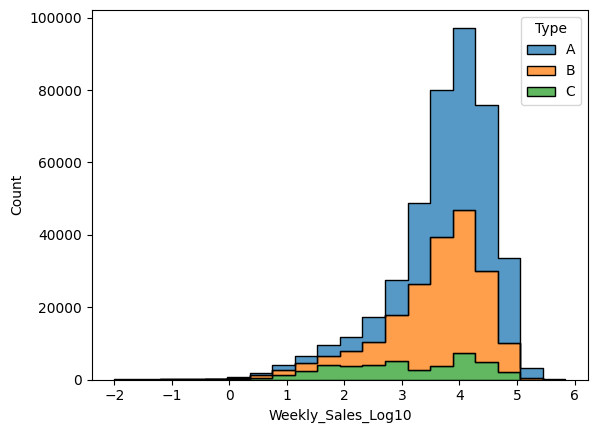

In [28]:
# Write the code to create a histogram here.
sns.histplot(data=df_normalized, x="Weekly_Sales_Log10", bins=20, hue="Type", multiple="stack", element="step")
plt.show()


## Task 10: Visualize Sales Performance by Store

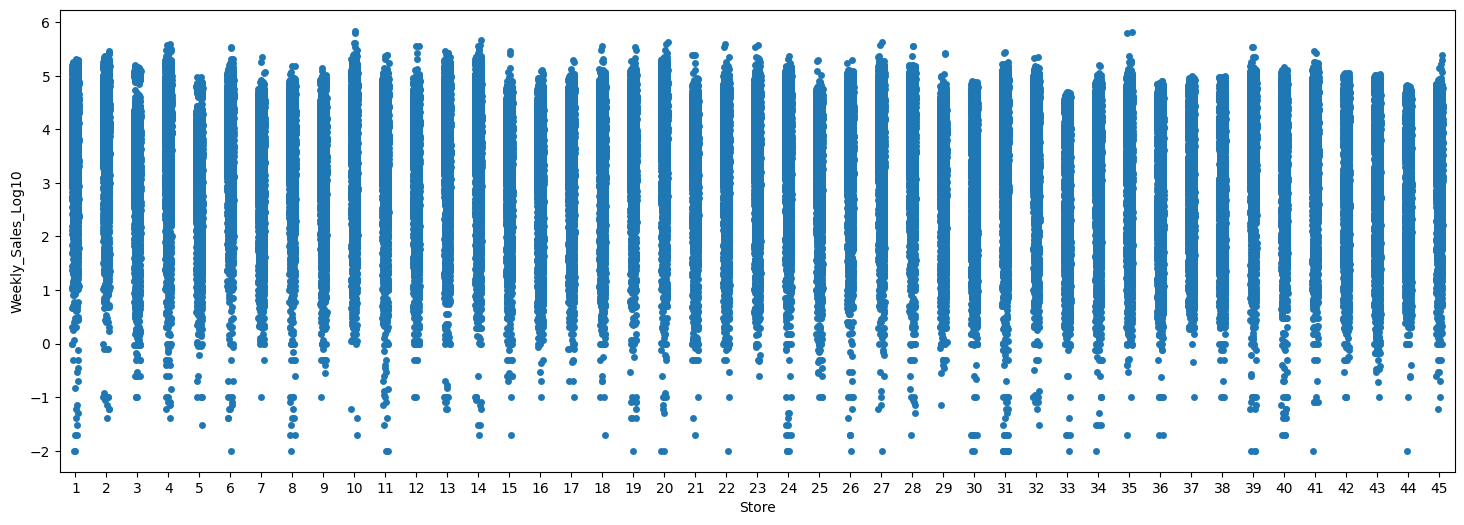

In [29]:
# Write the code to create a strip plot here.
plt.figure(figsize=(18,6))
sns.stripplot(data=df_normalized, x="Store", y="Weekly_Sales_Log10")
plt.show()


## Task 11: Visualize Sales Performance by Department

In [30]:
# Write the code to group the normalized DataFrame and retrieve the best performing departments here.
df_avg_sales = df_normalized.groupby(['Store','Dept'])["Weekly_Sales_Log10"].mean().to_frame().reset_index()

idx = df_avg_sales.groupby('Store')['Weekly_Sales_Log10'].idxmax()

df_best_dept = df_avg_sales.loc[idx]


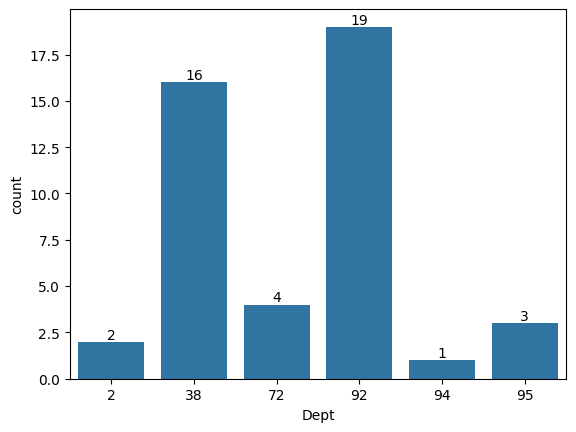

In [31]:
# Write the code to create a count plot here.
ax = sns.countplot(df_best_dept, x="Dept")
for label in ax.containers:
    ax.bar_label(label)
plt.show()


## Task 12: Visualize Correlation Between Sales and Temperature

In [32]:
# Write the code to partition the Temperature column into three groups here.
df_normalized['Temp_Cat'] = pd.cut(df_normalized['Temperature'], [-10, 50, 70, 110], labels=['<50',  '50-70', '>70'])

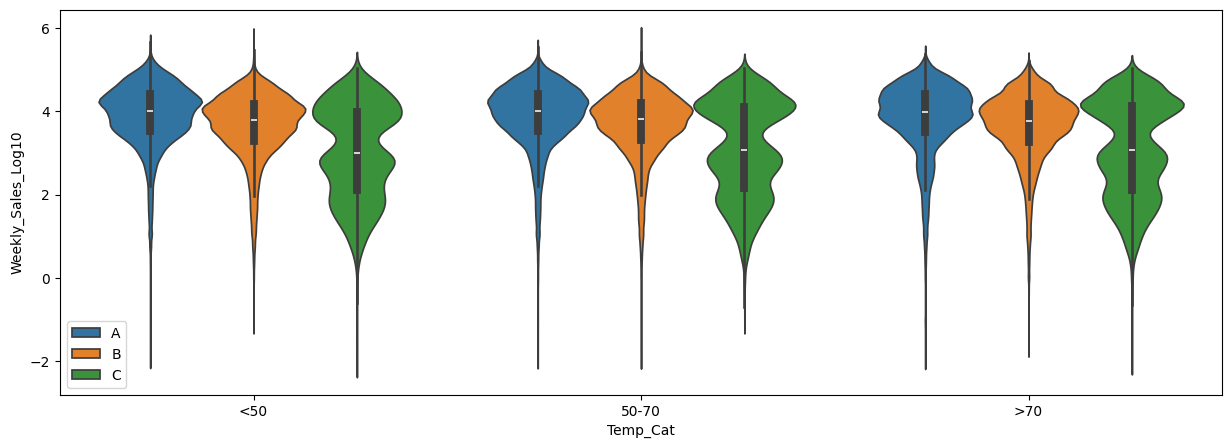

In [33]:
# Write the code to partition the Temperature column into three groups here.
plt.figure(figsize=(15,5))

sns.violinplot(data=df_normalized, x="Temp_Cat", y="Weekly_Sales_Log10", hue="Type")
plt.legend(loc='lower left')
plt.show()


## Task 13: Visualize Correlation between Sales and Holiday

In [34]:
# Write the code to calculate the average weekly sales for each combination group of IsHoliday and Type here.
df_avg_holiday = df_normalized.groupby(['IsHoliday','Type'])["Weekly_Sales_Log10"].mean().reset_index()

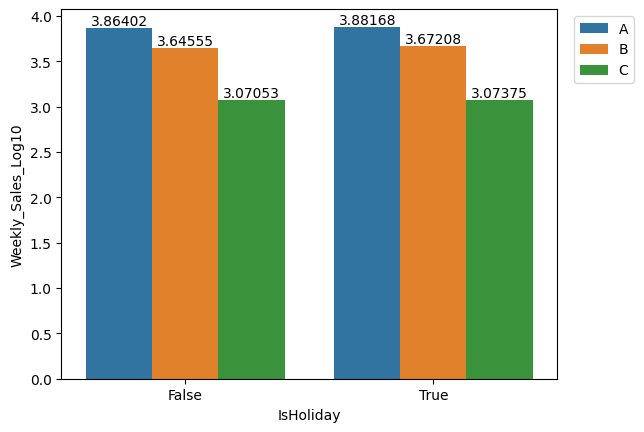

In [35]:
# Write the code to create the bar chart here.
ax = sns.barplot(data=df_avg_holiday, x='IsHoliday', y='Weekly_Sales_Log10', hue='Type')

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


## Task 14: Visualize Correlation between Sales and Economic Factors

In [36]:
# Write the code to group the normalized DataFrame calculate the mean values for weekly sales and the economic factors here.
df_avg_sales =  df_normalized.groupby(['Date'])["Weekly_Sales_Log10"].mean().reset_index()

df_avg_cpi = df_normalized.groupby(['Date'])["CPI"].mean().reset_index()

df_avg_fuel = df_normalized.groupby(['Date'])["Fuel_Price"].mean().reset_index()

df_avg_unemploy = df_normalized.groupby(['Date'])["Unemployment"].mean().reset_index()


In [37]:
# Write the code to merge the average values in a new DataFrame here.
df_eco = pd.DataFrame()
df_eco['AVG_Sales'] = df_avg_sales['Weekly_Sales_Log10']
df_eco['AVG_CPI'] = df_avg_cpi['CPI']
df_eco['AVG_Fuel'] = df_avg_fuel['Fuel_Price']
df_eco['AVG_Unemploy'] = df_avg_unemploy['Unemployment']


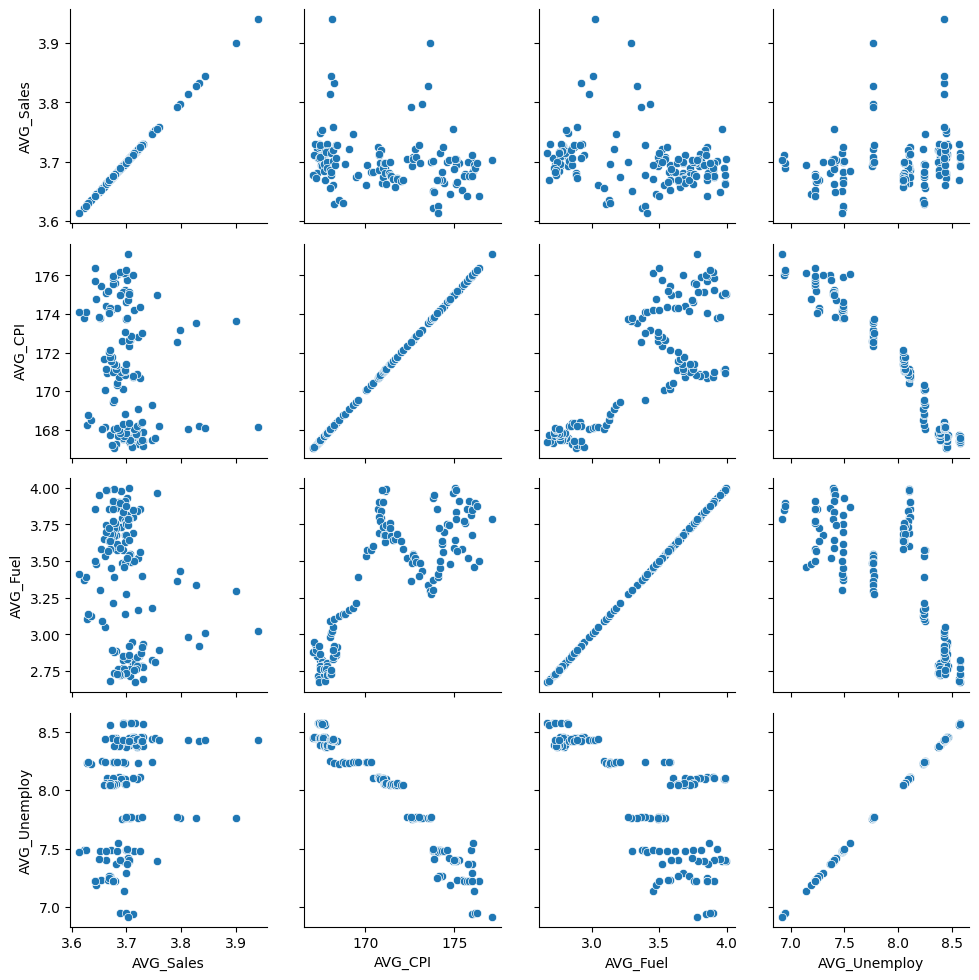

In [38]:
# Write the code to create scatter plots and put them in the facet grid format here.
g = sns.PairGrid(df_eco)
g.map(sns.scatterplot)
plt.show()


## Task 15: Visualize Correlation between Sales and Markdowns

In [39]:
# Write the code to group the normalized DataFrame based on dates and calculate the total weekly sales and total markdowns here.
df_markdowns = df_normalized.groupby('Date')[[ "Weekly_Sales", 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum().reset_index()

df_markdowns.set_index('Date', inplace=True)


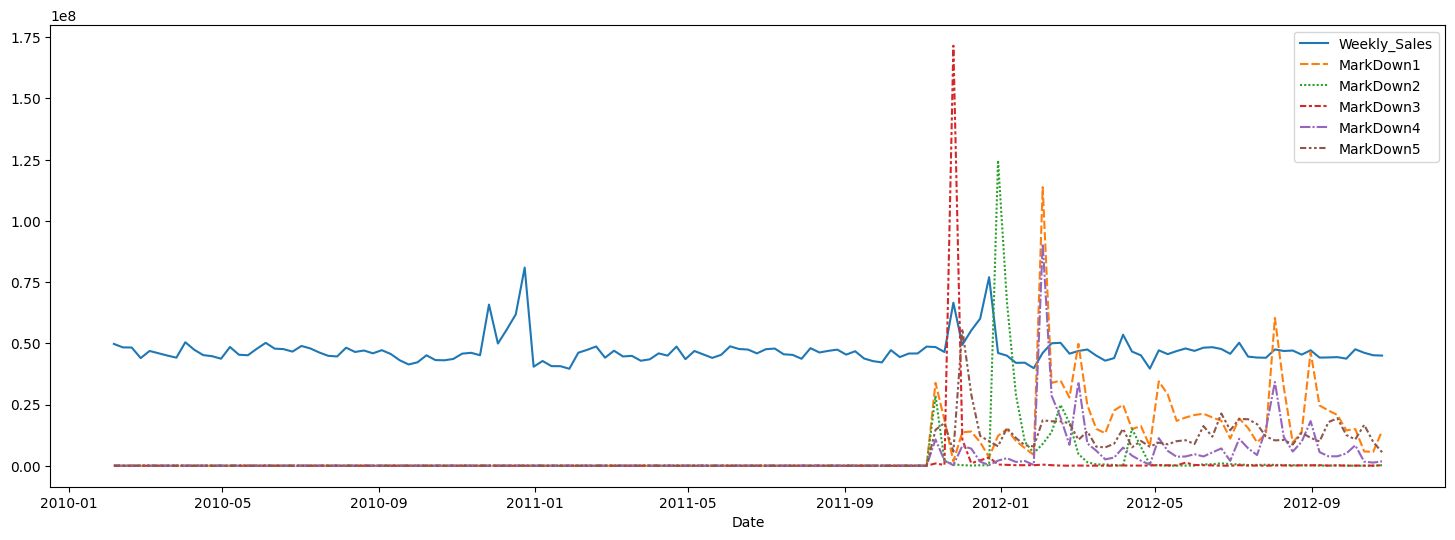

In [40]:
# Write the code to create a time series line chart here.
plt.figure(figsize=(18,6))
sns.lineplot(data = df_markdowns)
plt.show()


## Task 16: Feature Extraction

In [41]:
# Write the code to extract targeted features from the cleaned DataFrame here.
df_train_final = df_train_clean[['Date','Store','Dept','Type','IsHoliday', 'Weekly_Sales']].reset_index(drop=True)
df_test_final = df_test_clean[['Date','Store', 'Dept', 'Type','IsHoliday']].reset_index(drop=True)


In [42]:
# Write the code to show the first five records of the final training DataFrame here.
df_train_final.head()

,Date,Store,Dept,Type,IsHoliday,Weekly_Sales
0,2010-02-05,1,1,A,False,24924.50
1,2010-02-05,1,2,A,False,50605.27
2,2010-02-05,1,3,A,False,13740.12
3,2010-02-05,1,4,A,False,39954.04
4,2010-02-05,1,5,A,False,32229.38


In [43]:
# Write the code to show the first five records of the final test DataFrame here.
df_test_final.head()

,Date,Store,Dept,Type,IsHoliday
0,2012-11-02,1,1,A,False
1,2012-11-02,1,2,A,False
2,2012-11-02,1,3,A,False
3,2012-11-02,1,4,A,False
4,2012-11-02,1,5,A,False


## Task 17: Label Encoding

In [55]:
# Write the code to encode categorical variables from the final training DataFrame and show the first five records here.
df_train_final_encoded = df_train_final.copy()

df_train_final_encoded[['Type', 'IsHoliday']] = df_train_final[['Type', 'IsHoliday']].apply(LabelEncoder().fit_transform)

df_train_final_encoded.head()


,Date,Store,Dept,Type,IsHoliday,Weekly_Sales
0,2010-02-05,1,1,0,0,24924.50
1,2010-02-05,1,2,0,0,50605.27
2,2010-02-05,1,3,0,0,13740.12
3,2010-02-05,1,4,0,0,39954.04
4,2010-02-05,1,5,0,0,32229.38


In [56]:
# Write the code to encode categorical variables from the final test DataFrame and show the first five records here.
df_test_final_encoded = df_test_final.copy()

df_test_final_encoded[['Type', 'IsHoliday']] = df_test_final[['Type', 'IsHoliday']].apply(LabelEncoder().fit_transform)

df_test_final_encoded.head()


,Date,Store,Dept,Type,IsHoliday
0,2012-11-02,1,1,0,0
1,2012-11-02,1,2,0,0
2,2012-11-02,1,3,0,0
3,2012-11-02,1,4,0,0
4,2012-11-02,1,5,0,0


## Task 18: Feature Engineering

In [57]:
# Write the code to engineer features for the final encoded training DataFrames and display the records here.
df_train_final_encoded["Date"] = pd.to_datetime(df_train_final_encoded["Date"])

df_train_final_encoded["Month"] = df_train_final_encoded["Date"].dt.month

df_train_final_encoded['Weekly_Sales_Log10'] =  np.log10(df_train_final_encoded['Weekly_Sales'])

df_train_final_encoded.drop(['Date', 'Weekly_Sales'], axis=1, inplace=True)

df_train_final_encoded.head()


,Store,Dept,Type,IsHoliday,Month,Weekly_Sales_Log10
0,1,1,0,0,2,4.396626
1,1,2,0,0,2,4.704196
2,1,3,0,0,2,4.137991
3,1,4,0,0,2,4.601561
4,1,5,0,0,2,4.508252


In [58]:
# Write the code to engineer features for the final encoded test DataFrames and display the records here.
df_test_final_encoded["Date"] = pd.to_datetime(df_test_final_encoded["Date"])

df_test_final_encoded["Month"] = df_test_final_encoded["Date"].dt.month

df_test_final_encoded.drop(['Date'],axis=1, inplace=True)

df_test_final_encoded.head()


,Store,Dept,Type,IsHoliday,Month
0,1,1,0,0,11
1,1,2,0,0,11
2,1,3,0,0,11
3,1,4,0,0,11
4,1,5,0,0,11


## Task 19: Train a Model

In [59]:
# Write the code to prepare the training NumPy array here.
train_y = df_train_final_encoded['Weekly_Sales_Log10'].to_numpy()

train_x =  df_train_final_encoded[['Store', 'Dept', 'Type', 'IsHoliday', 'Month']].to_numpy()


In [60]:
# Write the code to prepare the test NumPy array here.
test_x = df_test_final_encoded.to_numpy()

In [61]:
# Write the code to train a random forest regressor here.
regressor = RandomForestRegressor()
regressor.fit(train_x, train_y)


RandomForestRegressor()

## Task 20: Forecast Sales using Model

In [62]:
# Write the code to make sales prediction on the test set here.
predictions = regressor.predict(test_x)

In [63]:
# Write the code to join the prediction results with the final test DataFrame and display the output here.
df_test_final['Predictions']= 10 ** (pd.Series(predictions))
df_test_final


,Date,Store,Dept,Type,IsHoliday,Predictions
0,2012-11-02,1,1,A,False,24109.453949
1,2012-11-02,1,2,A,False,44493.414238
2,2012-11-02,1,3,A,False,9571.497870
3,2012-11-02,1,4,A,False,37254.555652
4,2012-11-02,1,5,A,False,26874.202380
...,...,...,...,...,...,...
75618,2013-04-26,45,93,B,False,2548.747277
75619,2013-04-26,45,94,B,False,699.443548
75620,2013-04-26,45,95,B,False,51726.662721
75621,2013-04-26,45,97,B,False,6131.405472


## Task 21: Visualize Model's Predictions 

In [64]:
# Write the code to transform Date column of the final DataFrames here.
df_train_final["Date"] = pd.to_datetime(df_train_final["Date"])
df_test_final["Date"] = pd.to_datetime(df_test_final["Date"])

df_train_final.set_index('Date', inplace=True)
df_test_final.set_index('Date', inplace=True)


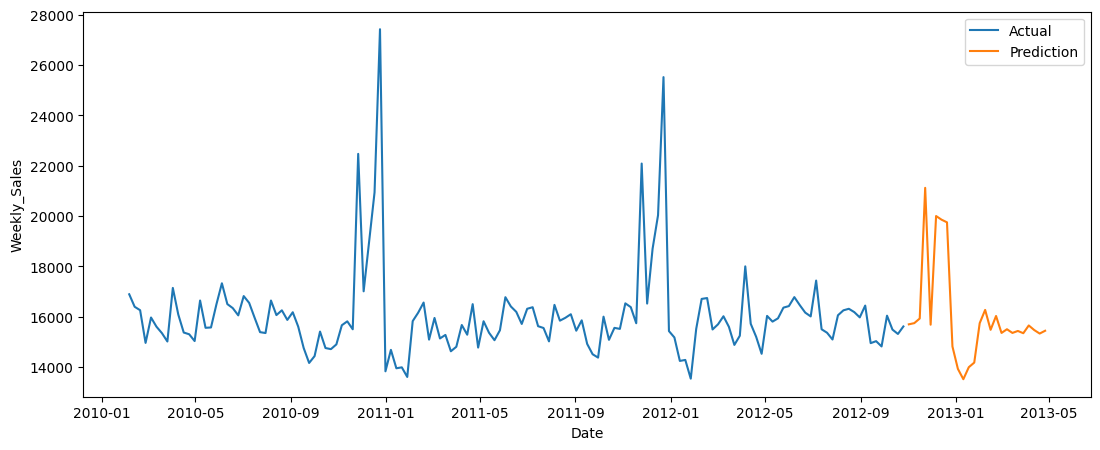

In [65]:
# Write the code to create a line plot with two lines here.
fig, ax = plt.subplots(1,1,figsize=(13,5))
sns.lineplot(df_train_final["Weekly_Sales"], label="Actual",errorbar=None)
sns.lineplot(df_test_final["Predictions"],label="Prediction", errorbar=None)
plt.show()
